# Project 3
Team members: Paul, Renata and Hero

In this notebook we are training models to predict whether a food place will pass or fail an inspection. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

C:\Users\heroa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
#number of unique establishments

len(chicago_inspections_2011_to_2013['DBA_Name'].unique())

9369

In [5]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [8]:
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.0,1,44-33,19.0,Retail Food Establishment,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,2011-10-18,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,50-23,24.0,Retail Food Establishment,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,50-25,17.0,Retail Food Establishment,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,39-48,17.0,Retail Food Establishment,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,2011-10-20,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,40-18,24.0,Retail Food Establishment,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

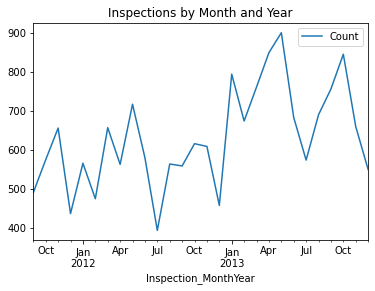

In [9]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

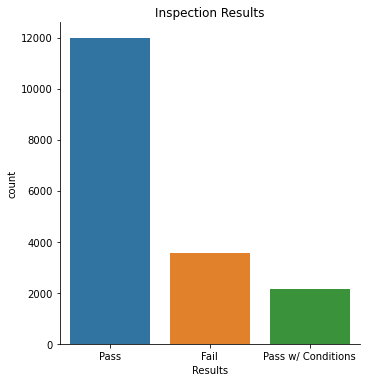

In [10]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

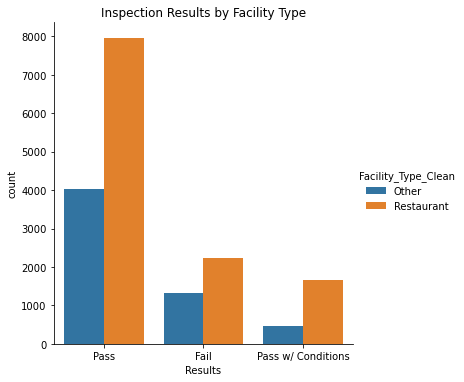

In [11]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [12]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [13]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [14]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

C:\Users\heroa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\heroa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


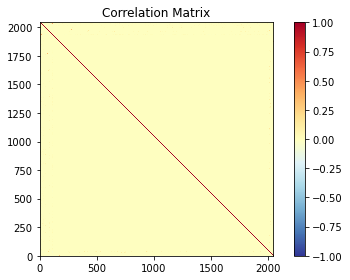

In [15]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

corr_matrix = np.corrcoef(X.T)
smg.plot_corr(corr_matrix)
plt.show()

# looks like there might be a few dots of high correlations...
# Hero: how should I read this plot?

In [16]:
# finding very highly correlated vars

for i in range(len(corr_matrix)):
    for j in range(i):
        if abs(corr_matrix[i,j]) > 0.9:
            print(X.columns[i], "and", X.columns[j])
            print(corr_matrix[i,j])
        

firstRecord and timeSinceLast
0.9042314533095998
Facility_Type_Clean_Other and Facility_Type_Restaurant
-1.0
Facility_Type_Clean_Restaurant and Facility_Type_Restaurant
1.0
Facility_Type_Clean_Restaurant and Facility_Type_Clean_Other
-1.0
WARD_PRECINCT_19-39 and Facility_Type_Private School
1.0
WARD_PRECINCT_29-36 and Facility_Type_CATERING/CAFE
1.0
WARD_PRECINCT_8-65 and Facility_Type_Shared Kitchen User (Long Term)
1.0
LICENSE_DESCRIPTION_Food - Shared Kitchen and Facility_Type_Shared Kitchen
1.0
LICENSE_DESCRIPTION_Mobile Food License and Facility_Type_Mobile Food Preparer
1.0
LICENSE_DESCRIPTION_Shared Kitchen User and Facility_Type_Shared Kitchen User (Long Term)
1.0
LICENSE_DESCRIPTION_Shared Kitchen User and WARD_PRECINCT_8-65
1.0
LICENSE_DESCRIPTION_Special Event Food and WARD_PRECINCT_43-25
0.9999999999999998
APPLICATION_TYPE_RENEW and APPLICATION_TYPE_ISSUE
-0.9838471057796982


Seems like we can safely drop: timeSinceLast, Facility_Type_Clean_Other, Facility_Type_Restaurant, WARD_PRECINCT_19-39, WARD_PRECINCT_29-36, WARD_PRECINCT_8-65, LICENSE_DESCRIPTION_Food - Shared Kitchen, LICENSE_DESCRIPTION_Mobile Food License, LICENSE_DESCRIPTION_Shared Kitchen User, WARD_PRECINCT_43-25, APPLICATION_TYPE_RENEW

In [17]:
X = X.drop(columns = ['timeSinceLast', 'Facility_Type_Clean_Other', 'Facility_Type_Restaurant', 
                      'WARD_PRECINCT_19-39', 'WARD_PRECINCT_29-36', 'WARD_PRECINCT_8-65', 
                      'LICENSE_DESCRIPTION_Food - Shared Kitchen', 'LICENSE_DESCRIPTION_Mobile Food License', 
                      'LICENSE_DESCRIPTION_Shared Kitchen User', 
                     'WARD_PRECINCT_43-25', 'APPLICATION_TYPE_RENEW'])

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

First, we initialize some lists to record our tuned hyperparameters and validation metrics for each model we run.

In [32]:
models = ['random forest', 'decision tree','svm', 'log']
parameters = []
trained_models = []
accuracy = []
recall = []
precision = []
f1_score = []

### Standardize Data
Before training the models, we standardize all our predictors. 

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns, index=X.index) 


In [33]:
#X.head()

### Model 1 - Random Forest and Decision Tree Classifier
A decision tree makes predictions based on a series of if-then conditions. A pro of decision trees is that they are highly flexible and allow for non-linear modelling. A con of decision trees is that they suffer from overfit, in which they can preduce low bias results for the training data but high variance results in the test data. To reduce the variance (at the cost of increased bias), we can impliment pruning techniques, such as controlling the maximum depth of the tree or setting a threshold for the Gini index below which we no longer split the data. We can also use ensemble methods, such as random forests, to reduce variance across multiple sets of data. 

In the context of this problem, a not-too complex decision tree (ie. one that has been pruned), could provide good insight into the types of predictors that are important for whether or not an establisment passes an inspection. This is useful for a policy context where policy makers not only want to know *which* establishments should be failed, but also *why* they are being failed. 

As a trade off between complexity and interprability, we start by training a random forest using five crossfold validation. Once the hyperparameters are tuned, the best model is fit on all the data and we plot the top 10 predictors that are most important. We then train a decision tree on the most important predictors and use the relevant hyperparameters from the random forest. The resulting decision tree gives an interpratable model for policy makers while benefitting from the **FILL IN** of a random forest. 

Upsampling the minority class in this model estimation using the imblearn package, in a method called Synthetic Minority Oversampling Technique (SMOTE). Info from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

#### Random Forest

In [21]:
#upsampling using SMOTE

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier())

# tune hyperparameters using cross validation 
rf_classifier = RandomForestClassifier()

# grid of potnetial hyperparameters
param_grid = {'randomforestclassifier__criterion': ['gini', 'entropy'],
             'randomforestclassifier__max_depth': [1, 5, 10],
             'randomforestclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'randomforestclassifier__random_state': [10]}

rf_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [22]:
# fit on entire data 
rf_grid.fit(X, y.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed: 10.3min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [1, 5, 10],
                         'randomforestclassifier__min_impurity_decrease': [0.0001,
                                                                           0.0005,
                                                                           0.001],
                         'randomforestclassifier__random_state': [10]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=10)

In [24]:
# report the best parameters from the grid search

# accuracy vs. precision 

best_index = np.argmax(rf_grid.cv_results_['mean_test_accuracy'])
rf_grid.cv_results_['params'][best_index]

# report various metrics from the best model
print(rf_grid.cv_results_['params'][best_index])
print("Mean accuracy is" ,rf_grid.cv_results_["mean_test_accuracy"][best_index])
print("Mean precision is" ,rf_grid.cv_results_["mean_test_precision"][best_index])
print("Mean recall is",rf_grid.cv_results_["mean_test_recall"][best_index])
print("Mean f1 is",rf_grid.cv_results_["mean_test_f1"][best_index])


{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_impurity_decrease': 0.0001, 'randomforestclassifier__random_state': 10}
Mean accuracy is 0.9013767917068366
Mean precision is 0.7119935201884731
Mean recall is 0.8616958558218334
Mean f1 is 0.7790806561892987


In [33]:
# record paramaters and metrics
parameters.append(rf_grid.cv_results_['params'][best_index])
trained_models.append(rf_grid.best_estimator_)
accuracy.append(rf_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(rf_grid.cv_results_["mean_test_precision"][best_index])
recall.append(rf_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(rf_grid.cv_results_["mean_test_f1"][best_index])

In [41]:
# calculate the accuracy score (rate of correct predictions) for 3 folds
#scores = cross_val_score(rf_classifier, X, y.ravel(), cv=3)

In [25]:
# return the mean accuracy score across the 5 cross validation folds
#scores.mean()

The plot below shows which features are actually important in our model. 

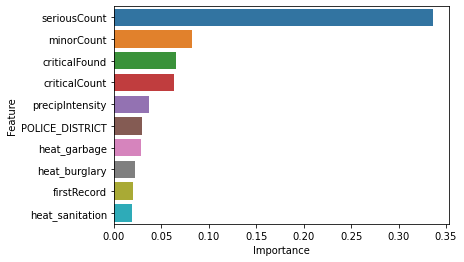

In [26]:
# Refit the random forest on the whole dataset to get feature importances
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              RandomForestClassifier(criterion = 'gini', max_depth = 10, 
                                                     min_impurity_decrease = 0.0001, random_state = 10))

imba_pipeline.fit(X, y.ravel())
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(imba_pipeline.steps[1][1].feature_importances_)]
                             , axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

The plot above shows that the most important predictors are the number of violations recorded for an establishment. The number of **serious** violations is the most important determinant for whether or not a establishment passes the inspection. This makes intuitive sense, as you can imagine inspectors summing up the number of violations and putting more weight on them if they are serious (we assume that serious is more of a violation than critical or minor). Given that only a subset of features are important, we retrain a simplified decision tree by using the subset of important features and placing additional limits on the complexity of the tree. This gives us a far more interpretable model, which we can even plot to see the decision paths for failing or passing establishments. 

#### Decision Tree
Using the four most important features above, we train a decision tree and tune the hyperparameters using crossfold validation. 

In [53]:
from sklearn.tree import DecisionTreeClassifier

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              DecisionTreeClassifier())

#dt_classifier = DecisionTreeClassifier()

param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [1, 5, 10],
             'decisiontreeclassifier__min_impurity_decrease': [0.0001, 0.0005, 0.001],
             'decisiontreeclassifier__random_state': [10]}

dt_grid = GridSearchCV(imba_pipeline, param_grid, cv = 5, 
                       scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                       refit = 'precision', verbose = 10)

In [68]:
# create reduced data frame 
important_features = feat_importances.nlargest(10, 'Importance')['Feature']
    # change this depending on how many predictors want to include

X_reduced = X[X.columns[X.columns.isin(important_features)]]

In [72]:
# fit on reduced data
dt_grid.fit(X_reduced, y.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed: 12.3min remaining:   43.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 5, 10],
                         'decisiontreeclassifier__min_impurity_decrease': [0.0001,
                                                                           0.0005,
                                                                           0.001],
                         'decisiontreeclassifier__random_state': [10]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=10)

In [73]:
# record the best parameters from the grid search
best_index = np.argmax(dt_grid.cv_results_['mean_test_accuracy'])

# report various metrics from the best model
print(dt_grid.cv_results_['params'][best_index])
print("Mean accuracy is" ,dt_grid.cv_results_["mean_test_accuracy"][best_index])
print("Mean precision is" ,dt_grid.cv_results_["mean_test_precision"][best_index])
print("Mean recall is",dt_grid.cv_results_["mean_test_recall"][best_index])
print("Mean f1 is",dt_grid.cv_results_["mean_test_f1"][best_index])

# update imba pipeline with tuned grid

{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.0005, 'decisiontreeclassifier__random_state': 10}
Mean accuracy is 0.9225393025583155
Mean precision is 0.7408954073004415
Mean recall is 0.9491568451584816
Mean f1 is 0.8317041605417073


In [74]:
# record paramaters and metrics
parameters.append(dt_grid.cv_results_['params'][best_index])
trained_models.append(dt_grid.best_estimator_)
accuracy.append(dt_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
recall.append(dt_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(dt_grid.cv_results_["mean_test_f1"][best_index])

IndexError: index 27 is out of bounds for axis 0 with size 10

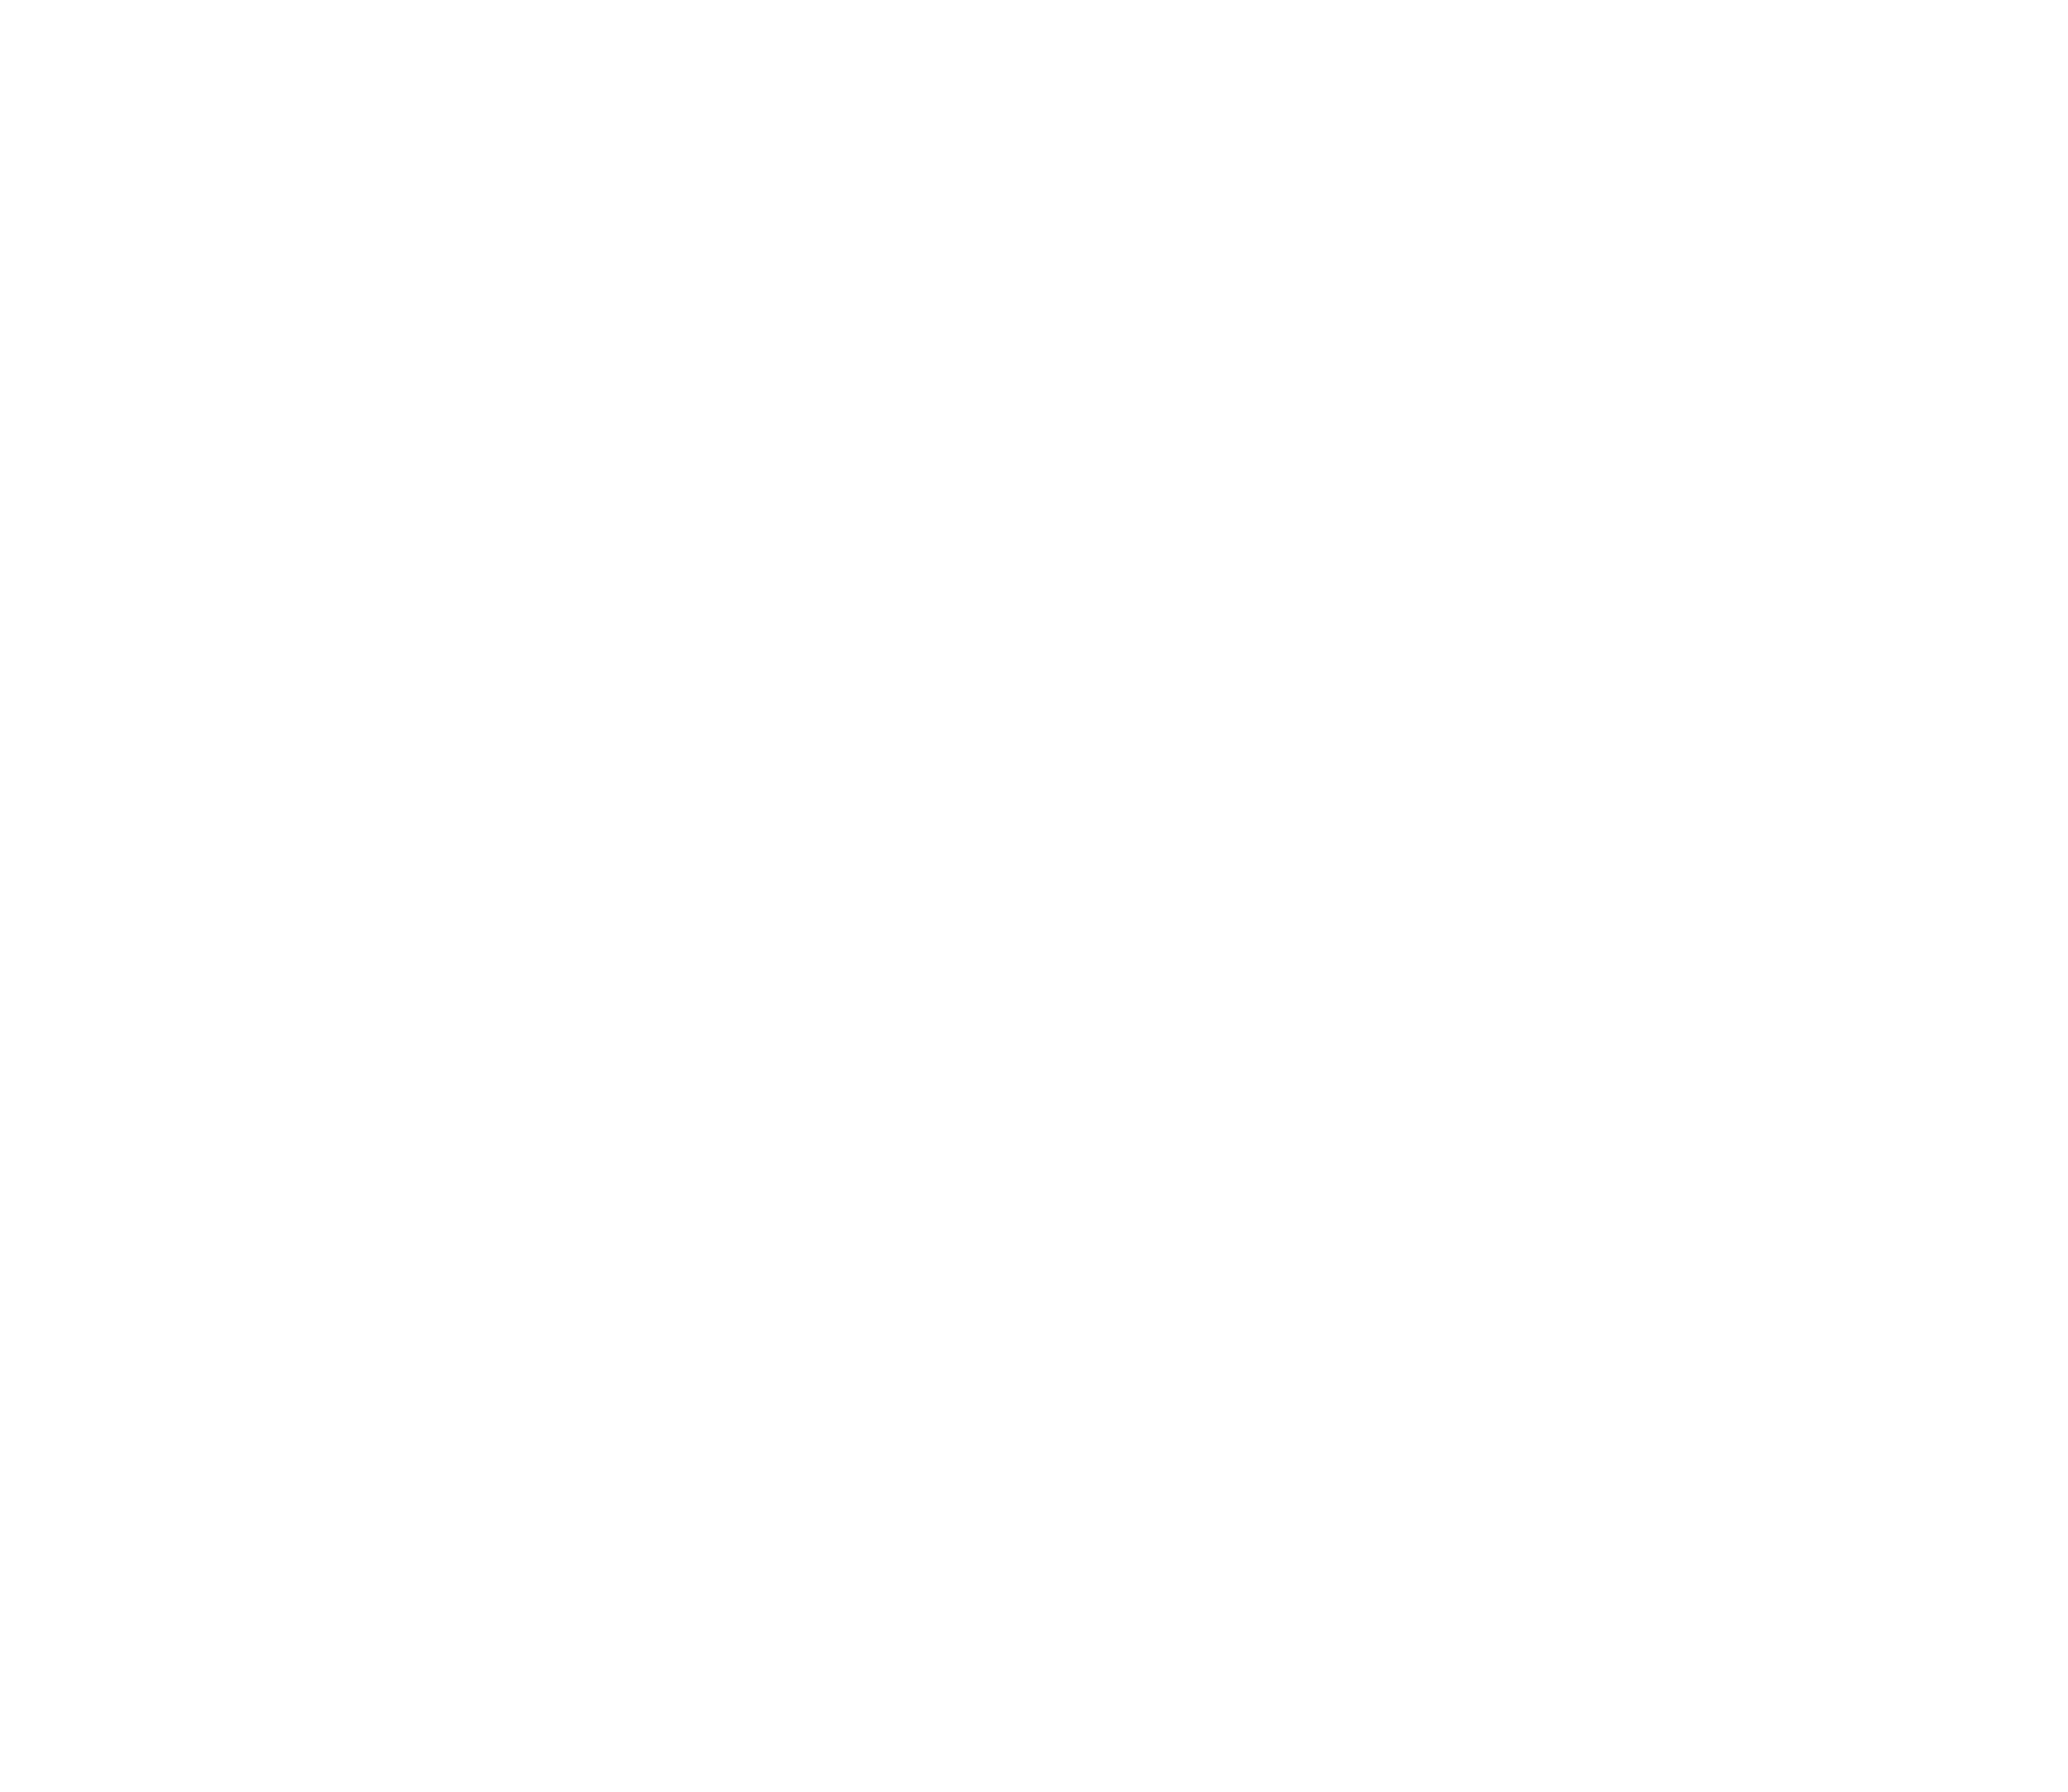

In [81]:
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(dt_grid.best_estimator_[1], #steps[1][1], 
                   feature_names=X_reduced.columns,  
                   class_names=["Pass", "Fail"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

In [82]:
from sklearn.model_selection import cross_validate

dt_tuned_scores = cross_validate(imba_pipeline, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1, verbose = 10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.2s remaining:   57.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   39.4s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.7s finished


In [83]:
for i in dt_tuned_scores:
    print("Average", i, "is", dt_tuned_scores[i].mean())

Average fit_time is 38.89206471443176
Average score_time is 0.06613626480102539
Average test_precision is 0.7544230890326447
Average test_accuracy is 0.9084318789419576
Average test_recall is 0.810836965586694
Average test_f1 is 0.7811376081742905


In [85]:
# record paramaters and metrics for decision tree
#parameters.append(rf_grid.cv_results_['params'][best_index])
#trained_models.append(rf_grid.best_estimator_)
accuracy.append(dt_grid.cv_results_["mean_test_accuracy"][best_index])
precision.append(dt_grid.cv_results_["mean_test_precision"][best_index])
recall.append(dt_grid.cv_results_["mean_test_recall"][best_index])
f1_score.append(dt_grid.cv_results_["mean_test_f1"][best_index])

In [86]:
dt_tuned_pipe = imba_pipeline

## Model 2

## LDA

PUT IN EXPLANATION

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

In [92]:
lda_model = clf.fit(X, y.ravel())

In [93]:
from sklearn.model_selection import cross_validate

#scores = cross_val_score(svm_model, X, y, cv=2)

lda_scores = cross_validate(lda_model, X, y.ravel(),
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                         cv=5, n_jobs = -1, verbose = 10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   58.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


In [94]:
for x in lda_scores.keys(): 
    print("Average", x, "is", lda_scores[x].mean())

Average fit_time is 71.20601081848145
Average score_time is 0.14844756126403807
Average test_accuracy is 0.8956964063825781
Average test_precision is 0.7653076483501526
Average test_recall is 0.6994246091065968
Average test_f1 is 0.728841941643987


In [224]:
#upsampling using SMOTE
# from https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis())

In [75]:
imba_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'lineardiscriminantanalysis', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'lineardiscriminantanalysis__n_components', 'lineardiscriminantanalysis__priors', 'lineardiscriminantanalysis__shrinkage', 'lineardiscriminantanalysis__solver', 'lineardiscriminantanalysis__store_covariance', 'lineardiscriminantanalysis__tol'])

In [225]:
#fyi this takes a while to run, even  w/ multiprocessing!

from sklearn.model_selection import GridSearchCV

#lda_reg = LinearDiscriminantAnalysis()

param_grid = {'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen'],
               'lineardiscriminantanalysis__shrinkage': ['auto', None]}

lda_grid_reg = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision', verbose = 10) 
lda_grid_reg.fit(X, y.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  4.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  4.8min remaining:   58.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.4min finished
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             iid=False, n_jobs=-1,
             param_grid={'lineardiscriminantanalysis__shrinkage': ['auto',
                                                                   None],
                         'lineardiscriminantanalysis__solver': ['svd', 'lsqr',
                                                                'eigen']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=10)

In [228]:
best_index = np.where(lda_grid_reg.cv_results_["rank_test_precision"] == 1)[0]


''''

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

'''''

for i in best_index:
    print(lda_grid_reg.cv_results_['params'][i])
    print("Mean accuracy is" ,lda_grid_reg.cv_results_["mean_test_accuracy"][i])
    print("Mean precision is" ,lda_grid_reg.cv_results_["mean_test_precision"][i])
    print("Mean recall is",lda_grid_reg.cv_results_["mean_test_recall"][i])
    print("Mean f1 is",lda_grid_reg.cv_results_["mean_test_f1"][i])
    print("Mean fit time is",lda_grid_reg.cv_results_["mean_fit_time"][i])

{'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'lsqr'}
Mean accuracy is 0.9084318882637316
Mean precision is 0.7359065804841479
Mean recall is 0.851635892452219
Mean f1 is 0.789464445603932
Mean fit time is 92.55055753389995
{'lineardiscriminantanalysis__shrinkage': 'auto', 'lineardiscriminantanalysis__solver': 'eigen'}
Mean accuracy is 0.9084318882637316
Mean precision is 0.7359065804841479
Mean recall is 0.851635892452219
Mean f1 is 0.789464445603932
Mean fit time is 103.87749314308167


In [231]:
# second round, tuning shrinkage parameter

from sklearn.model_selection import GridSearchCV

#lda_reg = LinearDiscriminantAnalysis()

param_grid = {'lineardiscriminantanalysis__solver': ['lsqr'],
               'lineardiscriminantanalysis__shrinkage': np.arange(0.8, 1.0, 0.01)}

lda_grid_reg = GridSearchCV(imba_pipeline, param_grid, cv=3, iid=False, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
                           refit = 'precision', verbose = 10) 

lda_grid_reg.fit(X, y.ravel())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.8min finished
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=10)),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             iid=False, n_jobs=-1,
             param_grid={'lineardiscriminantanalysis__shrinkage': array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'lineardiscriminantanalysis__solver': ['lsqr']},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=10)

In [103]:
#lda_grid_reg.cv_results_

{'mean_fit_time': array([87.20839224, 68.39065561, 77.85749078, 65.09573503, 59.64045491,
        61.12536302, 58.92644973, 59.92049351, 57.44649887, 60.14030733,
        57.97789841, 60.27884064, 56.21969242, 59.55354195, 56.43777204,
        58.12568655, 56.58327985, 58.20117359, 56.56705751, 56.29359536]),
 'std_fit_time': array([9.86137063, 6.8895992 , 1.23086588, 6.74770062, 1.12331169,
        1.41120772, 1.62545417, 1.59233247, 1.55706936, 1.19870139,
        1.58730882, 1.19888233, 1.28610808, 0.96213072, 0.98609065,
        1.11309458, 0.41129696, 0.78151401, 1.79184267, 2.88949065]),
 'mean_score_time': array([0.09956851, 0.        , 0.12619257, 0.08461394, 0.10249839,
        0.10884862, 0.10445004, 0.0952724 , 0.1092021 , 0.09892511,
        0.10781751, 0.10099697, 0.08908415, 0.10694566, 0.0981606 ,
        0.09576998, 0.07271676, 0.09435549, 0.08241568, 0.06616836]),
 'std_score_time': array([0.01756281, 0.        , 0.02230918, 0.00492055, 0.02308073,
        0.01743553, 

{'lineardiscriminantanalysis__shrinkage': 0.9, 'lineardiscriminantanalysis__solver': 'lsqr'}
Mean accuracy is 0.9181632533856886
Mean precision is 0.7566366762070066
Mean recall is 0.876255264010366
Mean f1 is 0.8118099494061907
Mean fit time is 50.61220169067383


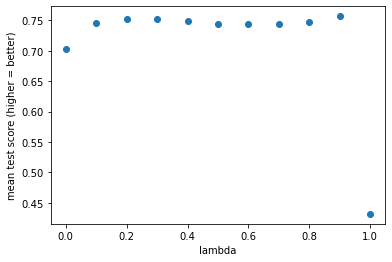

In [230]:
best_index = np.where(lda_grid_reg.cv_results_["rank_test_precision"] == 1)[0]


''''

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

'''''

for i in best_index:
    print(lda_grid_reg.cv_results_['params'][i])
    print("Mean accuracy is" ,lda_grid_reg.cv_results_["mean_test_accuracy"][i])
    print("Mean precision is" ,lda_grid_reg.cv_results_["mean_test_precision"][i])
    print("Mean recall is",lda_grid_reg.cv_results_["mean_test_recall"][i])
    print("Mean f1 is",lda_grid_reg.cv_results_["mean_test_f1"][i])
    print("Mean fit time is",lda_grid_reg.cv_results_["mean_fit_time"][i])
    

plt.scatter(lda_grid_reg.cv_results_['param_lineardiscriminantanalysis__shrinkage'], 
            lda_grid_reg.cv_results_["mean_test_precision"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

In [220]:
imba_pipeline = make_pipeline(SMOTE(random_state=10), 
                              LinearDiscriminantAnalysis(shrinkage = 0.89, solver = 'eigen'))

#imba_pipeline.fit(X, y.ravel())


In [221]:
lda_tuned_scores = cross_validate(imba_pipeline, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1, verbose = 10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.3min remaining:   50.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


In [222]:
for i in lda_tuned_scores:
    print("Average", i, "is", lda_tuned_scores[i].mean())

Average fit_time is 62.938301706314085
Average score_time is 0.10657620429992676
Average test_precision is 0.7569328479804298
Average test_accuracy is 0.9222779287904155
Average test_recall is 0.9063985355593671
Average test_f1 is 0.8245784712810853


In [125]:
lda_tuned_pipe = imba_pipeline

# SVM

In [94]:
from sklearn.svm import SVC

svm = make_pipeline(SMOTE(random_state=10), 
                              SVC())

svm_scores = cross_validate(svm, X, y, scoring=['precision', 'accuracy', 'recall', 'f1'],
                                  cv=5, n_jobs = -1)

In [96]:
for x in svm_scores.keys(): 
    print("Average", x, "is", svm_scores[x].mean())

Average fit_time is 468.3710587978363
Average score_time is 46.32334475517273
Average test_precision is 0.7363916823184392
Average test_accuracy is 0.9217556077435898
Average test_recall is 0.9543295935547829
Average test_f1 is 0.8309851078446429


In [100]:
svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'svc', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [101]:
#fyi this takes a while to run, even  w/ multiprocessing

# from sklearn.model_selection import GridSearchCV


# param_grid = {'svc__C': np.arange(0.1, 1.0, 0.1),
#                'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#              'svc__gamma': ['scale', 'auto'],
#              'svc__shrinking': [True, False]}

# svm_grid_reg = GridSearchCV(svm, param_grid, cv=5, iid=False, 
#                             scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs = -1,  
#                            refit = 'precision') 
# svm_grid_reg.fit(X, y.ravel())

KeyboardInterrupt: 

In [ ]:
best_index = np.where(svm_grid_reg.cv_results_["rank_test_precision"] == 1)[0]


''''

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

'''''

for i in best_index:
    print(svm_grid_reg.cv_results_['params'][i])
    print("Mean accuracy is" , svm_grid_reg.cv_results_["mean_test_accuracy"][i])
    print("Mean precision is" ,svm_grid_reg.cv_results_["mean_test_precision"][i])
    print("Mean recall is",svm_grid_reg.cv_results_["mean_test_recall"][i])
    print("Mean f1 is",svm_grid_reg.cv_results_["mean_test_f1"][i])

## Model 3

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

For the models above, we have recorded various validation metrics as we go along. We gather those into a data frame and report them below.

In [51]:
data_tuples = list(zip(models, parameters, accuracy, precision, recall, f1_score, trained_models))
models_df = pd.DataFrame(data_tuples, columns=['Model', 'Parameters', "Accuracy", "Precision", "Recall", "F1 Score", "Trained_Model"])
models_df.head()

,Model,Parameters,Accuracy,Precision,Recall,F1 Score,Trained_Model
0,random forest,"{'randomforestclassifier__criterion': 'gini', ...",0.901377,0.711994,0.861696,0.779081,"(SMOTE(random_state=10), (DecisionTreeClassifi..."
1,decision tree,"{'decisiontreeclassifier__criterion': 'gini', ...",0.921886,0.735961,0.956598,0.831557,"(SMOTE(random_state=10), DecisionTreeClassifie..."


## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

Imagine that the City of Chicago only had resources to conduct 1000 food safety inspections. Generate a list of the 1000 riskiest establishments. Using your chosen metric, demonstrate how well your algorithm prioritized finding potential violations.

Then, conduct a simulation where you choose 1000 establishments to ran- domly audit. Again using your chosen metric, how well did random audits do? How did random auditing compare to predictive auditing?

- predictive auditing of targeting based on probabilities from the model 
- random audit and seeing how many failed establishments we got 
- if this were real life, the point of having this model is to direct where the inspections take place 

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]